<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
# import statements

# regex for doc processing
import re
import string

# matplotlib for vis, and sklearn vect for pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt

# stats analysis
import pandas as pd
import numpy as np

# spacy for NLP, and tokenizer for pipeline
import spacy
from spacy.tokenizer import Tokenizer

# squarify and matplotlib for vis, and KNN for stats vis
import squarify
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read thru the documentation to accomplish this task. 

`Tip:` You will need to install the `bs4` library inside your conda environment. 

In [18]:
from bs4 import BeautifulSoup
import requests

df = pd.read_csv('./data/job_listings.csv')

In [20]:
# Data processing, standardizing the data for improved analytitics (treating the 'description' column)

# df['description'].head()

# replaces partial html
df['description'] = df['description'].str.replace(r'\\(x|n)[a-z0-9]{0,2}', ' ')

# cleasn remainig html code
df['description'] = df['description'].str.replace(r'<[^<]+?>', '').str.replace(r'^b.', '')

# cleans forward slash, and replaces with white space
df['description'] = df['description'].str.replace('/', ' ')

df['description'][0]

'Job Requirements: Conceptual understanding in Machine Learning models like Nai  ve Bayes, K-Means, SVM, Apriori, Linear  Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them Intermediate to expert level coding skills in Python R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role) Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R Ability to communicate Model findings to both Technical and Non-Technical stake holders Hands on experience in SQL Hive or similar programming language Must show past work via GitHub, Kaggle or any other published article Master\'s degree in Statistics Mathematics Computer Science or any other quant specific field. Apply Now"'

In [23]:
# punct_cleaning function cleans remaining punctuation and upper/lower case standerdization

def punct_cleaning(column):
    processed_data = []
    for i in column:
        text = re.sub('[%s]' % string.punctuation, '', i).lower()
        processed_data.append(text)
    return pd.DataFrame(processed_data)

In [25]:
# applying punct_cleaning function to dataframe colum 'description'

df['description'] = punct_cleaning(df['description'])
df['description'][0]

'job requirements conceptual understanding in machine learning models like nai  ve bayes kmeans svm apriori linear  logistic regression neural random forests decision trees knn along with handson experience in at least 2 of them intermediate to expert level coding skills in python r ability to write functions clean and efficient data manipulation are mandatory for this role exposure to packages like numpy scipy pandas matplotlib etc in python or ggplot2 dplyr tidyr in r ability to communicate model findings to both technical and nontechnical stake holders hands on experience in sql hive or similar programming language must show past work via github kaggle or any other published article masters degree in statistics mathematics computer science or any other quant specific field apply now'

## 2) Use Spacy to tokenize the listings 

In [26]:
# instantiating spacy english nlp

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [10]:
# Tokenization of elements in 'description' column

tokens = []

for doc in tokenizer.pipe(df['description'], batch_size=500):
    doc_tokens = []
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False) & (token.pos_ != 'PRON'):
            doc_tokens.append(token.lemma_.lower().strip(":;., "))
    tokens.append(doc_tokens)

df['tokens'] = tokens

In [30]:
doc = df['description'][0]

doc

'job requirements conceptual understanding in machine learning models like nai  ve bayes kmeans svm apriori linear  logistic regression neural random forests decision trees knn along with handson experience in at least 2 of them intermediate to expert level coding skills in python r ability to write functions clean and efficient data manipulation are mandatory for this role exposure to packages like numpy scipy pandas matplotlib etc in python or ggplot2 dplyr tidyr in r ability to communicate model findings to both technical and nontechnical stake holders hands on experience in sql hive or similar programming language must show past work via github kaggle or any other published article masters degree in statistics mathematics computer science or any other quant specific field apply now'

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [11]:

##### Your Code Here #####
# create vectorizer
vect = CountVectorizer(lowercase=False)

# build vocab & transform text
dtm = vect.fit_transform(str(x) for x in df['tokens'])

# convert to dense
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

# look at word counts in df
dtm.head()

,00,02,02115,03,030,04,0547069,06366,08,10,...,zero,zeus,zf,zheng,zillow,zogsports,zone,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [12]:
dtm = dtm.append(dtm.agg('sum'), ignore_index=True)

In [13]:
totals = dtm.tail(1)

In [14]:
top_20 = totals.T.sort_values(by=[426], ascending=False)[:20].reset_index()

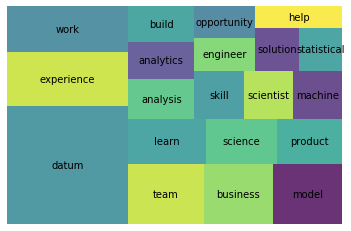

In [15]:
squarify.plot(sizes=top_20[426], label=top_20['index'], alpha=.8)
plt.axis('off')
plt.show();

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [16]:
# Instantiate vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# create vocabulary and get word count
tfidf_dtm = tfidf.fit_transform(str(x) for x in df['tokens'])

# get feature names & create dataframe
tfidf_dtm = pd.DataFrame(tfidf_dtm.todense(), columns=tfidf.get_feature_names())

tfidf_dtm.head()

,00,02,02115,03,030,04,0547069,06366,08,10,...,zero,zeus,zf,zheng,zillow,zogsports,zone,zoom,zuckerberg,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.110442,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# Add totals to use for visualization
tfidf_dtm = tfidf_dtm.append(tfidf_dtm.agg('sum'), ignore_index=True)


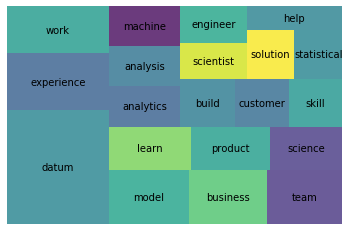

In [18]:

# Create visualization
totals = tfidf_dtm.tail(1)
top_20 = totals.T.sort_values(by=[426], ascending=False)[:20].reset_index()
squarify.plot(sizes=top_20[426], label=top_20['index'], alpha=.8)
plt.axis('off')
plt.show();

In [19]:
tfidf = TfidfVectorizer(stop_words='english',
                        ngram_range=(1,2),
                        max_df=.97,
                        min_df=3)

# create vocabulary and get word count
tfidf_dtm = tfidf.fit_transform(str(x) for x in df['tokens'])

# get feature names & create dataframe
tfidf_dtm = pd.DataFrame(tfidf_dtm.todense(), columns=tfidf.get_feature_names())

tfidf_dtm.head()


,10,10 time,10 year,100,100 company,100 country,100 premium,1000,100000,11,...,youd help,youll,youll help,youll leverage,youll need,youll work,youre,youre look,youve,yr
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:

# Add totals to use for visualization
tfidf_dtm = tfidf_dtm.append(tfidf_dtm.agg('sum'), ignore_index=True)


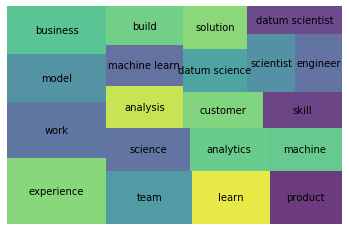

In [21]:

# Generate visualization
totals = tfidf_dtm.tail(1)
top_20 = totals.T.sort_values(by=[426], ascending=False)[:20].reset_index()
squarify.plot(sizes=top_20[426], label=top_20['index'], alpha=.8)
plt.axis('off')
plt.show();

## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [22]:

##### Your Code Here #####
# Fit NN model
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(tfidf_dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [25]:
new_desc = ['''
''']

In [26]:
new_desc = tfidf.transform(new_desc)

In [28]:
nn.kneighbors(new_desc.todense())

(array([[1., 1., 1., 1., 1.]]), array([[ 69, 402,  70, 206, 352]]))

In [30]:
df.iloc[402]

Unnamed: 0                                                   402
description    junior data scientist  big data entrylevel  10...
title             Junior Data Scientist - Big Data (Entry-Level)
tokens         [junior, datum, scientist, , big, datum, entry...
Name: 402, dtype: object

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 